In [ ]:
# Importing Libraries
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

# Accuracy and loss graph
import matplotlib.pyplot as plt
import tensorflow

In [25]:
train_data_path = '/content/drive/MyDrive/train'
validation_data_path ='/content/drive/MyDrive/valid-20220112T095445Z-001/valid'

In [26]:
def plot_images(images_arr):
  fig, axes = plt.subplots(1,5, figsize=(20,20))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()

In [27]:
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

training_data = training_datagen.flow_from_directory(train_data_path,
                                                     target_size=(200,200),
                                                     batch_size=128,
                                                     class_mode='binary')

Found 3656 images belonging to 2 classes.


In [28]:
training_data.class_indices

{'with_mask': 0, 'without_mask': 1}

In [29]:
# scaling validation data

valid_datagen = ImageDataGenerator(rescale=1./255)

valid_data = valid_datagen.flow_from_directory(validation_data_path,
                                               target_size=(200,200),
                                               batch_size=128,
                                               class_mode='binary')

Found 806 images belonging to 2 classes.


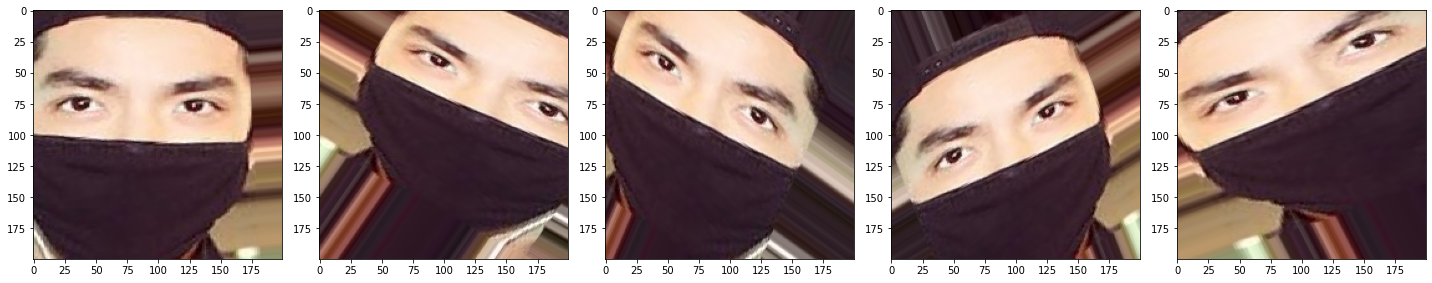

In [30]:
# Showing Augmented Images
images = [training_data[0][0][0] for i in range(5)]
plot_images(images)

In [31]:
# save best model using vall accuracy
model_path = '/content/drive/MyDrive/Sports Personality Classifier/model.h5'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy',verbose=1,save_best_only = True, mode='max')
callbacks_list = [checkpoint]


In [33]:
# Building CNN Model

cnn_model = keras.models.Sequential([
                                     keras.layers.Conv2D(filters=32, kernel_size=5, input_shape=[200,200,3]),
                                     keras.layers.MaxPooling2D(pool_size=(4,4)),
                                     keras.layers.Conv2D(filters=64, kernel_size=4),
                                     keras.layers.MaxPooling2D(pool_size=(3,3)),
                                     keras.layers.Conv2D(filters=128, kernel_size=3),
                                     keras.layers.MaxPooling2D(pool_size=(2,2)),
                                     keras.layers.Conv2D(filters=256, kernel_size=2),
                                     keras.layers.MaxPooling2D(pool_size=(2,2)),

                                     keras.layers.Dropout(0.5),
                                     keras.layers.Flatten(),
                                     keras.layers.Dense(units=128, activation='relu'),
                                     keras.layers.Dropout(0.1),
                                     keras.layers.Dense(units=256, activation='relu'),
                                     keras.layers.Dropout(0.25),
                                     keras.layers.Dense(units=2, activation='softmax')

])
# Compiling Model
cnn_model.compile(optimizer=Adam(lr=0.001),loss='sparse_categorical_crossentropy', metrics=['accuracy'])    

In [ ]:
# train cnn model
history = cnn_model.fit(training_data, 
                          epochs=50, 
                          verbose=1, 
                          validation_data= valid_data,
                          callbacks=callbacks_list) # time start 14.25

In [ ]:
cnn_model.save('/content/drive/MyDrive/Sports Personality Classifier/model_last.h5')

In [ ]:
# train cnn model
history = cnn_model.fit(training_data, 
                          epochs=50, 
                          verbose=1, 
                          validation_data= valid_data,
                          callbacks=callbacks_list) # time start 14.25

In [ ]:
cnn_model.save('/content/drive/MyDrive/Sports Personality Classifier/model_last.h5')

In [ ]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(cnn_model.history['loss'], label='train loss')
plt.plot(cnn_model.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(cnn_model.history['accuracy'], label='train acc')
plt.plot(cnn_model.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')